## Write Custom Function to Compute Histogram for a Numerical Array

- You can use numpy

- Your function takes two arguments: 1- list 2- interval

- Your function would return a dictionary with intervals as keys and how many of elements in list are in the intervals as values



In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../titanic-data/titanic.csv')

In [8]:
# histogram function

# def custom_hist(ls, interval):
#     hist_ls_dict = dict()
#     min_ls = np.min(ls)
#     max_ls = np.max(ls)
#     I = np.ceil((max_ls - min_ls) / interval)
#     for j in range(...):
#         hist_ls_dict[j]= ...      
#     return hist_ls_dict
        


import math
def custom_hist(ls, interval):
    value_hist = dict()
    for val in ls:
        if '{} - {}'.format((val // interval) * interval ,(val // interval) * interval + interval) in value_hist:
            value_hist['{} - {}'.format((val // interval) * interval ,(val // interval) * interval + interval)] += 1
        else:
            value_hist['{} - {}'.format((val // interval) * interval ,(val // interval) * interval + interval)] = 1
    return value_hist

print(custom_hist(df['Age'].dropna().values, 16))


{'16.0 - 32.0': 345, '32.0 - 48.0': 197, '48.0 - 64.0': 76, '0.0 - 16.0': 83, '64.0 - 80.0': 12, '80.0 - 96.0': 1}


## For visualization part, you should elaborate on the following 

<BarContainer object of 6 artists>

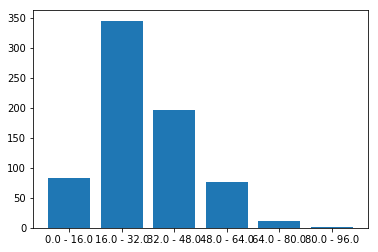

In [18]:
import matplotlib.pyplot as plt

hist_dict = custom_hist(df['Age'].dropna().values, 16)
sorted_hist_list = sorted(list(zip(hist_dict.keys(), hist_dict.values())))
plt.bar([key for key, val in sorted_hist_list], [val for key, val in sorted_hist_list])

## Q2: How we can plot histogram of Age for female and male with legend?  

Use Pandas with .groupby method and plot the following 

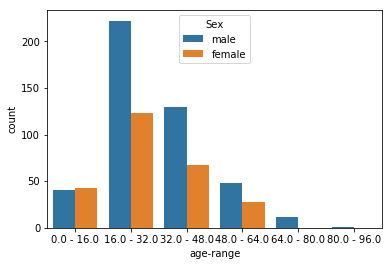

In [141]:
hist_dict_male = custom_hist(df[df['Sex'] == 'male']['Age'].dropna().values, 16)
hist_dict_female = custom_hist(df[df['Sex'] == 'female']['Age'].dropna().values, 16)

list_dict_male = sorted(list(zip(hist_dict_male.keys(), hist_dict_male.values())))
list_dict_female = sorted(list(zip(hist_dict_female.keys(), hist_dict_female.values())))

# mdf = pd.DataFrame(list_dict_male)
# fdf = pd.DataFrame(list_dict_female)
# mdf[0] 
# mdf["Sex"] = 'male'
# fdf["Sex"] = 'female'

# print(mdf)
# print()
# print(fdf)

# zdf = mdf.merge(fdf, how='outer')
# print(zdf)

# sns.countplot(x=0, hue='Sex', data = zdf)


# GROSS BUT IT WORKS!
import seaborn as sns

arr = []
for key, val in list_dict_male:
    for i in range(val):
        arr.append((key, 'male'))

for key, val in list_dict_female:
    for i in range(val):
        arr.append((key, 'female'))
        
arrdf = pd.DataFrame(arr)
arrdf['age-range'] = arrdf[0]
arrdf['Sex'] = arrdf[1]
sns.countplot(x='age-range', hue='Sex', data = arrdf)
